In [1]:
pip install langgraph 

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pydantic-2.12.3-py3-none-any.whl.metadata (87 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached langsmith-0.4.38-py3-none-any.whl.metadata (14 kB)
  Using cached pyyaml-6.0.3-cp312-cp312-win_amd64.whl.metadata (2.4 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached orjson-3.11.4-cp312-cp312-win_amd64.whl.metadata (42 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.41.4-cp312-cp312-win_amd64.whl.metadata (7.4 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached anyio-4.11.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached certifi-2025.10.5-py3-none-any.whl.metadata (2.5 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.11-py3-none

In [2]:
from langgraph.graph import StateGraph, MessagesState, START, END

def mock_llm(state: MessagesState):
    return {"messages": [{"role": "ai", "content": "hello world"}]}

graph = StateGraph(MessagesState)
graph.add_node(mock_llm)
graph.add_edge(START, "mock_llm")
graph.add_edge("mock_llm", END)
graph = graph.compile()

graph.invoke({"messages": [{"role": "user", "content": "hi!"}]})

{'messages': [HumanMessage(content='hi!', additional_kwargs={}, response_metadata={}, id='5ae70681-889b-4fc1-aa76-ca5dc322639f'),
  AIMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='da7d4aae-847d-4df9-909d-6bd20f6ef99b')]}

In [3]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [10]:

pip install langchain-groq

  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import os
from langchain_groq import ChatGroq

# Set your API key securely
os.environ["GROQ_API_KEY"] = "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"

# Initialize the model (model name is case-sensitive!)
llm = ChatGroq(model="llama-3.3-70b-versatile"
    )

# Example prompt
response = llm.invoke("Explain the difference between REST API and gRPC in simple terms.")

print(response.content)


**Introduction to REST API and gRPC**

REST (Representational State of Resource) API and gRPC are two popular communication protocols used for building web services. While both enable data exchange between systems, they differ in their approach, advantages, and use cases.

**REST API**
------------

*   **Definition:** REST API is an architectural style for designing networked applications.
*   **Characteristics:**
    *   Uses HTTP/HTTPS protocol
    *   Resource-based (e.g., users, products)
    *   Client-server architecture
    *   Stateless (each request contains all necessary information)
    *   Cacheable (responses can be cached to reduce requests)
    *   Supports multiple data formats (e.g., JSON, XML)
*   **Use cases:**
    *   Web applications
    *   Mobile apps
    *   Public APIs

**gRPC**
--------

*   **Definition:** gRPC is a high-performance RPC (Remote Procedure Call) framework.
*   **Characteristics:**
    *   Uses HTTP/2 protocol
    *   Service-based (e.g., user 

In [17]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [18]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

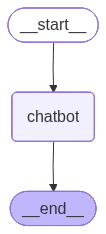

In [19]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
pip install langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage,AnyMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode


In [35]:
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [38]:
input={"messages":["hi, my name is nikhil"]}
app.invoke(input)


{'messages': [HumanMessage(content='hi, my name is nikhil', additional_kwargs={}, response_metadata={}, id='2d743ace-2dc8-446c-83fd-3d64a08bfd88'),
  AIMessage(content="Hello Nikhil! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 43, 'total_tokens': 70, 'completion_time': 0.050841237, 'prompt_time': 0.002475754, 'queue_time': 0.055974016, 'total_time': 0.053316991}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--340be153-227d-46c4-97d5-37c635581103-0', usage_metadata={'input_tokens': 43, 'output_tokens': 27, 'total_tokens': 70})]}

In [40]:
@tool
def search(query: str):
    """this is my custom tool"""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "it's 60 degrees and foggy"
    return "it is 90 degrees and sunny"


In [41]:
search.invoke("what is a temperature in sf")

"it's 60 degrees and foggy"

In [42]:
search.invoke('what is weather in india')

'it is 90 degrees and sunny'

In [43]:
search

StructuredTool(name='search', description='this is my custom tool', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001934806EFC0>)

In [44]:
tools=[search]

In [45]:
tool_node=ToolNode(tools)

In [46]:
llm_with_tool=llm.bind_tools(tools)

In [64]:
def call_model(state: MessagesState):
    messages=state['messages']
    response=llm_with_tool.invoke(messages)
    return {"messages":{response}}

In [67]:
from langchain_core.messages import HumanMessage

def call_model(state):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

# Usage
response = call_model({"messages": [HumanMessage(content="hi how are you?")]})
print(response["messages"][0].content)

I'm doing well, thanks for asking. Is there something I can help you with or would you like to chat?
